# Undesrtanding A Pesistence Homology Matrix
In this example, we will look at a reduced matrix of smith normal form to understand the births and deaths of cycles in persistence homology computation. Large part of this example is a commentary of the following thread on dionysus [forum.](https://groups.io/g/dionysus/topic/representatives_of_bars/32216531?p=,,,20,0,0,0::recentpostdate%2Fsticky,,,20,2,0,32216531)

This tutorial requires successful installation of dionysus2 and a decent understanding of homology groups, cycles and boundaries. We use Vietoris-Rips simplicial complex formation for filtration.

In [1]:
import dionysus as dion
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# First create a square as our data set
A = []
for i in [-1,1]:
    for j in [-1, 1]:
        cv = [i, i]
        cv[1] *= j
        A.append(cv)
A = np.array(A, float)
print(A)

[[-1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [ 1.  1.]]


In [3]:
# Compute relevant VR complex using dionysus Rips function
filtration = dion.fill_rips(A, 3, 3.0)
print(filtration)
for simplex in filtration:
    print(simplex)

Filtration with 15 simplices
<0> 0
<1> 0
<2> 0
<3> 0
<0,1> 2
<0,3> 2
<1,2> 2
<2,3> 2
<0,2> 2.82843
<1,3> 2.82843
<0,1,2> 2.82843
<0,1,3> 2.82843
<0,2,3> 2.82843
<1,2,3> 2.82843
<0,1,2,3> 2.82843


Now we compute a persistence homology and express each filtration interms of its birth and death time.

Following rules are used to read off the persistence diagram printed below:
1. We use the colon operator to differentiate stuff that is happening before and after the addition of a particular simplex
2. Items printed after the colon indicate the `cycles` that were zero before the addition of `simplex` printed before the colon

Now let us look at the homology reduce matrix to understanding the `birth` and `deaths` of cycles.

Following will serve as a basic introduction to a homology group:
1. A `p-chain` is a formal sum of `p-simplicies` in a simplicial complex with coeffients in any field
2. Boundary of any p-simplex is a sum of (p-1)-dimensional faces
3. A `p-cycle` is a p-chain with empty boundary.
4. A group of p-cycles is the kernel of pth boundary homomorphisms $Z_p = Ker (\delta_p)$. For example, a 0-cycle is a collection of vertices because boundary of each vertex is zero. Equivalently, for any simplex, 0-cycle is complete set of vertices.
5. A `pth-homology group` is pth-cycle group modulo p-th boundary groupn $H_p = Z_p / B_p$ where $B_p$ is pth-boundary group

In [4]:
# compute persistent homology
hfp = dion.homology_persistence(filtration)
 
for i,c in enumerate(hfp):
    print(filtration[i],end=': ')
    print(" + ".join(["%d * %s" % (x.element, filtration[x.index]) for x in c]))

<0> 0: 
<1> 0: 
<2> 0: 
<3> 0: 
<0,1> 2: 1 * <0> 0 + 1 * <1> 0
<0,3> 2: 1 * <0> 0 + 1 * <3> 0
<1,2> 2: 1 * <1> 0 + 1 * <2> 0
<2,3> 2: 
<0,2> 2.82843: 
<1,3> 2.82843: 
<0,1,2> 2.82843: 1 * <0,1> 2 + 1 * <1,2> 2 + 1 * <0,2> 2.82843
<0,1,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,3> 2.82843
<0,2,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,2> 2 + 1 * <2,3> 2
<1,2,3> 2.82843: 
<0,1,2,3> 2.82843: 1 * <0,1,2> 2.82843 + 1 * <0,1,3> 2.82843 + 1 * <0,2,3> 2.82843 + 1 * <1,2,3> 2.82843


Let us now look at sections of the printed reduced boundary matrix:
```
<0> 0: 
<1> 0: 
<2> 0: 
<3> 0:
```
Meaning of the above section is that, at $\ell=0$, four `vertices` are created and the all act as `0-cycles`.

```
<0,1> 2: 1 * <0> 0 + 1 * <1> 0
<0,3> 2: 1 * <0> 0 + 1 * <3> 0
<1,2> 2: 1 * <1> 0 + 1 * <2> 0
<2,3> 2: 
<0,2> 2.82843: 
<1,3> 2.82843:
```
This section contains addition of all the `1-simplices` which are in plain english can be thought of as edges. We can read the following from the above:
1. `<0,1>` gets added a $\ell=2$ and it `kills(death of )` the following simplices printed after the colon `<0>, <1>`. Similarily for others. 
2. You can also read that for addition of `<0,1>` edge occurs at $\ell=2$ and it kills `0-cycles` which are born at $\ell=0$. Thus this will be shown as a bar with an interval $\ell \in [0,2)$
3. Simplcies `<2,3>` addition form a `1-cycle` at $\ell=2.0$ and simplicies `<0,2>,<1,3>` are born at $\ell=2\sqrt(2)$ and all form `1-cycles`

In particular, addition of the above simplcies at $\ell=2$ resulted in the death of **four** `0-cycles` created at $\ell=0$. 

==> 4 bars of the interval  $\ell \in [0,2)$ for $H_0$

```
<0,1,2> 2.82843: 1 * <0,1> 2 + 1 * <1,2> 2 + 1 * <0,2> 2.82843
<0,1,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,3> 2.82843
<0,2,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,2> 2 + 1 * <2,3> 2
<1,2,3> 2.82843:
```
Above reading can be extended to the higher order simplcies and they tell us that `<0,1,2>, <0,1,3>, <0,2,3>` all kill are born and killed at the same time i.e. $\ell=2\sqrt(2)$.

However, simplex `<0,2,3>` has a bar length of $\ell \in [2,2\sqrt(2))$ as can be read from stuff before and after colon. This reprsents a `1-cycle` which is born at the addition of simplex `<2,3>` at $\ell=2$ and is dead after the addition of `<0,2,3>` at $\ell=2\sqrt(2)$. 

==> Thus the bar representing a `1-cycle` $\ell \in [2,2\sqrt(2))$ for $H_1$.



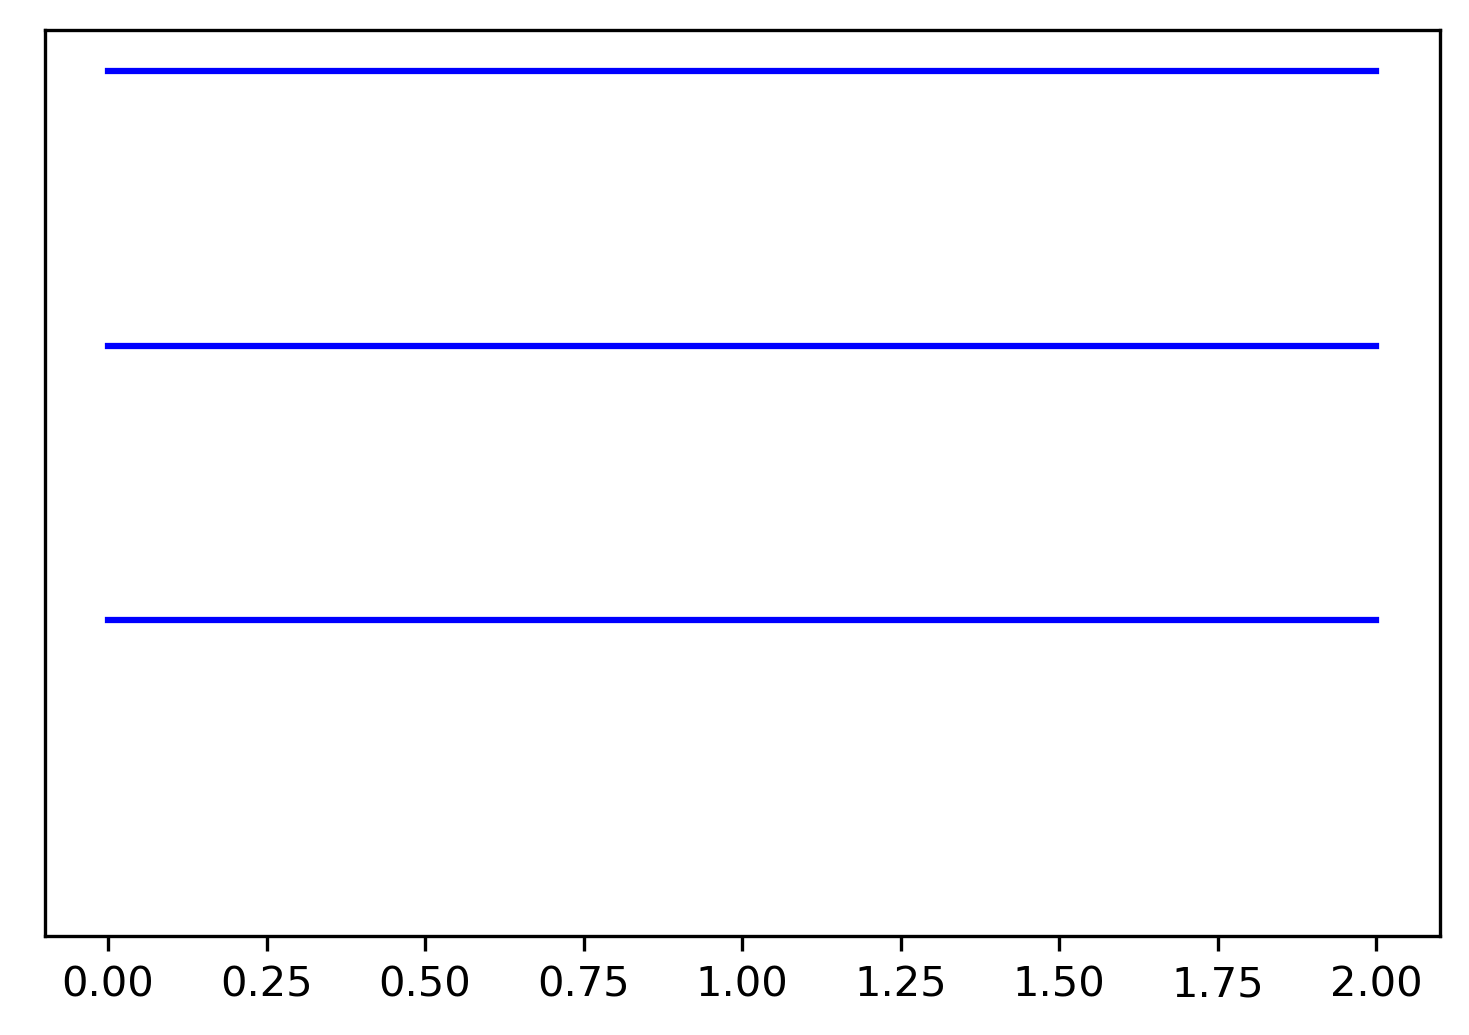

In [5]:
# Plot the barcode
dgms = dion.init_diagrams(hfp, filtration)
%matplotlib inline
mpl.rcParams['figure.dpi']=300
dion.plot.plot_bars(dgms[0], show = False)
plt.yticks([])
plt.show()

We now verify our computation of persistence diagram from the reduced matrix using the dionysus computation.

In [6]:
dgms[0]

Diagram with 4 points

One of the primary usage of understanding cycles is that you can obtain representative of the bars or points in the persistence diagrams. As showcased in another example using dual component of Homology, the representative cycles can be used find richer representations of the data set. In the following, we showcase how we compute representative 0-cycles to obtain a approximation for the connected components.

In [7]:
print("Dimension : Simplex vertices")

repcycles = []
for i,c in enumerate(hfp):
    if len(c)>0:
        #print(filtration[i],end=': ')
        print(filtration[i].dimension(), end=': ')
        birth = filtration[i].data
        deaths =[]
        vertices = []
        for x in c:
            simplex = filtration[x.index]
            deaths.append(filtration[x.index].data)
            for s in simplex:
                print(s, end=' ')
                vertices.append(s)
        death = np.max(np.unique(np.asarray(deaths)))
        vertices = np.unique(np.asarray(vertices))
        vertices = np.append(vertices,[filtration[i].dimension(), birth, death])
#         print(birth-death,'\n')
        if birth-death>0.0:
            print('a bar \n')
            repcycles.append(vertices)
        else:
            print('no bar \n')
        # print(" + ".join(["%d * %s" % (x.element, filtration[x.index]) for x in c]))

Dimension : Simplex vertices
1: 0 1 a bar 

1: 0 3 a bar 

1: 1 2 a bar 

2: 0 1 1 2 0 2 no bar 

2: 0 1 0 3 1 3 no bar 

2: 0 1 0 3 1 2 2 3 a bar 

3: 0 1 2 0 1 3 0 2 3 1 2 3 no bar 



In [8]:
def FindRepresentativeCycles(HomPer, thresh=0.0):
    '''
    This function can be used to collect representative cycles of the bars in a persistence
    diagram.
    This function takes a homology persistence class from dionysus as a input along with
    an optional threshold value in terms of the lifetime of the bar.
    The output is a numpy array of representative cycles. Each row in the array is one cycle per bar,
    with last three columns of each row reprsenting: dimension, birth and death of the cycle.
    Rest of the columns in the array are vertices in the cycle.
    
    All the dimensional cycles in the homology persistence are computed by default.
    '''
    repcycles = []
    for i,c in enumerate(hfp):
        if len(c)>0:
            birth = filtration[i].data 
            deaths =[]
            vertices = []
            for x in c:
                simplex = filtration[x.index]
                deaths.append(filtration[x.index].data)
                for s in simplex:
                    vertices.append(s)
            death = np.max(np.unique(np.asarray(deaths)))
            vertices = np.unique(np.asarray(vertices))
            vertices = np.append(vertices,[filtration[i].dimension(), birth, death])
            if birth-death>thresh:
                repcycles.append(vertices)
    return repcycles

In [9]:
FindRepresentativeCycles(hfp, thresh=1.0)

[array([0., 1., 1., 2., 0.]),
 array([0., 3., 1., 2., 0.]),
 array([1., 2., 1., 2., 0.])]

Above printed array is a collection of vertices (or data points) that contribute to each bar in the persistence bar code.